<a href="https://colab.research.google.com/github/abhignas/Codeforces/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install selenium

In [ ]:
!sudo apt-get update

Hit:1 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:12 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:13 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Reading package lists... Done


In [ ]:
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromium-chromedriver is already the newest version (81.0.4044.138-0ubuntu0.18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 59 not upgraded.


In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

In [ ]:
from selenium import webdriver

In [ ]:
c_op=webdriver.ChromeOptions()
c_op.add_argument('--headless')
c_op.add_argument('--no-sandbox')
c_op.add_argument('--disable-dev-shm-usage')
wd=webdriver.Chrome('chromedriver',chrome_options=c_op)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: use options instead of chrome_options
  """


In [ ]:
wd.get("https://www.flipkart.com/mobiles/pr?sid=tyy,4io&otracker=categorytree")

In [ ]:
heads=wd.find_element_by_class_name("tVe95H")
print(heads.text)

3 GB RAM | 32 GB ROM | Expandable Upto 256 GB


In [ ]:
heads=wd.find_elements_by_class_name("tVe95H")
for i in heads:
  print(i.text)

In [ ]:
cnt=0
for j in range(11):
  wd.get('https://www.flipkart.com/mobiles/mi~brand/pr?sid=tyy%2C4io&otracker=clp_metro_expandable_2_5.metroExpandable.METRO_EXPANDABLE_mobile-phones-store_ZHYC957RFL_wp3&fm=neo%2Fmerchandising&iid=M_1088a008-c474-4f51-a780-558a0e8cfa6a_5.ZHYC957RFL&ppt=clp&ppn=mobile-phones-store&ssid=qpcrx1fvww0000001589812470507&page={}'.format(j))
  
  dd = wd.find_elements_by_class_name("_3wU53n")

  prices = wd.find_elements_by_class_name("_1vC4OE._2rQ-NK")
  
  ram= wd.find_elements_by_class_name("tVe95H")

  for i in range(len(dd)):
    #k=ram[i].split()

    print(dd[i].text,prices[i].text,ram[i].text)
    
    cnt+=1

print(cnt)

Redmi Note 6 Pro (Red, 64 GB) ₹11,999 6 GB RAM | 64 GB ROM | Expandable Upto 256 GB
Redmi Note 7 Pro (Space Black, 64 GB) ₹12,999 15.9 cm (6.26 inch) Full HD+ Display
Mi A2 (Black, 64 GB) ₹10,599 12MP + 5MP | 20MP + 2MP Dual Front Camera
Redmi Note 7 Pro (Astro Moonlight White, 128 GB) ₹13,999 4000 mAh Li-polymer Battery
Redmi 8 (Onyx Black, 64 GB) ₹9,499 Qualcomm Snapdragon 636 Processor
Redmi Note 8 (Cosmic Purple, 128 GB) ₹15,890 Brand Warranty of 1 Year Available for Mobile and 6 Months for Accessories
Redmi Note 8 (Neptune Blue, 128 GB) ₹15,986 6 GB RAM | 64 GB ROM | Expandable Upto 256 GB
Redmi 8A (Sunset Red, 32 GB) ₹6,999 16.0 cm (6.3 inch) Full HD+ Display
Redmi Note 7 Pro (Neptune Blue, 128 GB) ₹13,999 48MP + 5MP | 13MP Front Camera
Redmi Note 8 (Neptune Blue, 32 GB) ₹10,978 4000 mAh Li-polymer Battery
Redmi Note 8 (Moonlight White, 128 GB) ₹15,990 Qualcomm Snapdragon 675 Processor
Redmi Note 7S (Onyx Black, 64 GB) ₹11,999 Splash Proof - Protected by P2i
Redmi 8 (Ruby Red, 64

In [ ]:
wd.get("https://www.flipkart.com/mobiles/pr?sid=tyy,4io&otracker=categorytree")

In [ ]:
ram = []
mem = []
price = []

while len(ram)<=200:
  char = wd.find_elements_by_class_name("tVe95H")

  for i in char:
    temp = i.text.split()
    if 'RAM' in temp and 'ROM' in temp:
      ram.append(int(temp[temp.index('RAM')-2]))
      mem.append(int(temp[temp.index('ROM')-2]))

  p = wd.find_elements_by_xpath('//*[@class="_1vC4OE _2rQ-NK"]')
  #extract the data
  for i in p:
    price.append(int(i.text[1:].replace(',',''))) #12999

  wd.get(wd.find_element_by_class_name("_3fVaIS").get_attribute('href'))
  #link for the next page

In [ ]:
print(len(ram),len(mem),len(price))

212 212 216


In [ ]:
import numpy as np
x=np.array((ram,mem)).T
y=np.array(price[:-4])
#print(int(len(x_train*0.8)))
print(x.shape,y.shape)

(212, 2) (212,)


In [ ]:
import pandas as pd
X=pd.DataFrame(x,columns=['RAM','ROM'])
Y=pd.DataFrame(y,columns=["Price"])

In [ ]:
#train ing the model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [ ]:
lm=LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lm.intercept_)
print(lm.coef_)

[11624.22148208]
[[-218.79913002   38.53874487]]


In [ ]:
cdf=pd.DataFrame(data=lm.coef_.reshape(2,1),index=x_train.columns,columns=['Coeff'])
cdf

,Coeff
RAM,-218.799130
ROM,38.538745


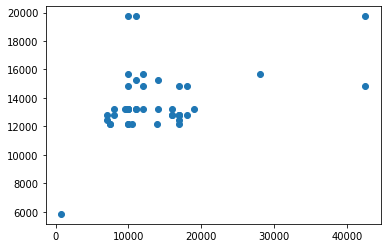

In [ ]:
import matplotlib.pyplot as plt
predictions=lm.predict(x_test)
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 5070.725557898731
RMSE: 7107.473839075977
